In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

In [3]:

data = pd.read_csv('KOBIS.csv')
data.columns = ['ID','Movie_Name', 'Director',	'Production_Company',	'Import_Company',	'Distributing_Agency',	'Release_Date',	'Movie_Type',	'Movie_Form',	'Nationality',	'National_number_screens',	'National_Sales',	'National_Audience',	'Seoul_Sales',	'Seoul_Audience',	'Genre',	'Rating',	'Movie_Classification']
data['National_Audience'] = data['National_Audience'].str.replace(",","").astype(int)
data['National_Audience']

0        17613682
1        13624328
2        12302831
3        16264944
4        13934592
           ...   
26192           1
26193          75
26194           1
26195           1
26196           1
Name: National_Audience, Length: 26197, dtype: int64

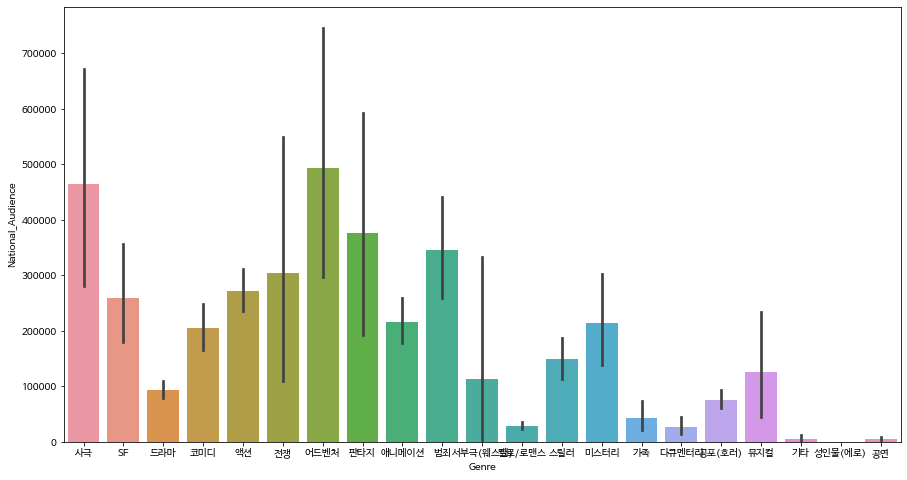

In [ ]:
# Audience by genre in every 5~10 years
fig, ax = plt.subplots(figsize=(15, 8))
fig = sns.barplot(x=data['Genre'], y=data['National_Audience'])
plt.show()

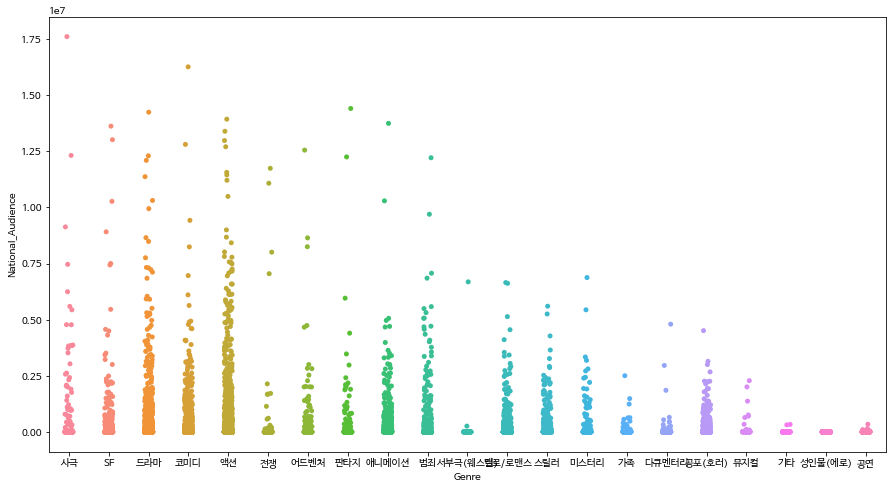

In [ ]:
# Audience by genre in every 5~10 years
fig, ax = plt.subplots(figsize=(15, 8))
fig = sns.stripplot(x=data['Genre'], y=data['National_Audience'])
plt.show()